In [45]:
#Import Libraries

# data manipulation
import pandas as pd
import numpy as np
from datetime import timezone, timedelta, time, datetime


# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("seaborn-darkgrid")
rcParams['figure.figsize'] = (12,  6)

# Portugal

The map below is an easy way to understand the division of Continental Portugal.

![Portugal Continental Map](img/portugal-continental.png "Portugal Continental Map")


* Porto and North
* Center
* Alentejo
* Lisbon and Tejo Valley
* Algarve


In [46]:
# Districts
Northen  = ['Viana Do Castelo', 'Porto', 'Braga', 'Vila Real', 'Bragança']
Center   = ['Castelo Branco', 'Viseu', 'Guarda', 'Aveiro', 'Coimbra', 'Leiria']
Algarve  = ['Faro']
Alentejo = ['Évora', 'Beja', 'Portalegre', 'Santarém']
Lisbon   = ['Lisboa', 'Setúbal']

In [47]:
# Load and Read dataset
df = pd.read_excel('datasets/wildfire.xlsx')

#Checking dataset head
df.head()

,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,...,Falso Alarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF
0,2015,DM315252,2015160007544,Florestal,Viana do Castelo,Ponte de Lima,Serdedelo,VALE DE TROVELA (SERDEDELO),160746,167814,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Alto Minho
1,2015,DM215305,2015130043758,Florestal,Porto,Marco de Canaveses,Vila Boa de Quires,LUGAR DO FOFO,130731,193731,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Tâmega
2,2015,DM415293,2015030021973,Florestal,Braga,Vila Verde,Lage,RUA PROF ABEL MADEIRA,31323,172162,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
3,2015,DM315261,2015160007563,Falso Alarme,Viana do Castelo,Ponte de Lima,Boalhosa,J. DEPOSITOS DE AGUA (BOALHOSA),160709,171291,...,1,0,0,0,NaN,NaN,630.0,Desconhecida,Entre Douro e Minho,Alto Minho
4,2015,BL115321,2015180015874,Agrícola,Viseu,Castro Daire,Castro Daire,Farejinhas - Bº das Queirós,180304,217299,...,0,1,0,0,NaN,NaN,630.0,Desconhecida,Beira Litoral,Dão Lafões


In [48]:
#Checking dataset tail
df.tail()

,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,...,Falso Alarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF
23170,2015,DM4151671,2015030056919,Florestal,Braga,Fafe,Fafe,RUA DE FORNELO,30709,196478,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
23171,2015,BL1151018,2015180041997,Florestal,Viseu,Cinfães,Cinfães,Ventuzela,180403,203110,...,0,0,1,0,NaN,NaN,125.0,Negligente,Entre Douro e Minho,Tâmega
23172,2015,BL3151227,2015010055691,Falso Alarme,Aveiro,Santa Maria da Feira,Feira,avenida 25 de abril,10906,164395,...,1,0,0,0,NaN,NaN,NaN,NaN,Entre Douro e Minho,AMP e Entre Douro e Vouga
23173,2015,DM2153226,2015130115988,Florestal,Porto,Paços de Ferreira,Paços de Ferreira,Lugar alto das Cavadas,130912,180666,...,0,1,0,0,NaN,NaN,711.0,Reacendimento,Entre Douro e Minho,Tâmega
23174,2015,BL3151229,2015010055723,Falso Alarme,Aveiro,Santa Maria da Feira,Rio Meão,Casais de Baixo,10921,161792,...,1,0,0,0,NaN,NaN,NaN,NaN,Entre Douro e Minho,AMP e Entre Douro e Vouga


In [49]:
# Inspecting dataset colunms name
df.columns

Index(['Ano', 'Codigo SGIF', 'Codigo_ANPC', 'Tipo', 'Distrito', 'Concelho',
       'Freguesia', 'Local', 'INE', 'x', 'y', 'lat', 'lon', 'DataAlerta',
       'HoraAlerta', 'DataExtincao', 'HoraExtincao', 'Data1Intervencao',
       'Hora1Intervencao', 'FonteAlerta', 'NUT', 'AA_Povoamento (ha)',
       'AA_Mato (ha)', 'AA_Agricola (ha)',
       'AA_EspacosFlorestais (pov+mato)(ha)', 'AA_Total (pov+mato+agric) (ha)',
       'Reacendimentos', 'Queimada', 'Falso Alarme', 'Fogacho', 'Incendio',
       'Agricola', 'Perimetro', 'APS', 'Causa', 'TipoCausa', 'Região PROF',
       'UGF'],
      dtype='object')

In [50]:
# Inspecting data type and dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23175 entries, 0 to 23174
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ano                                  23175 non-null  int64  
 1   Codigo SGIF                          23175 non-null  object 
 2   Codigo_ANPC                          23175 non-null  int64  
 3   Tipo                                 23175 non-null  object 
 4   Distrito                             23175 non-null  object 
 5   Concelho                             23175 non-null  object 
 6   Freguesia                            23175 non-null  object 
 7   Local                                23174 non-null  object 
 8   INE                                  23175 non-null  int64  
 9   x                                    23175 non-null  int64  
 10  y                                    23175 non-null  int64  
 11  lat                         

In [51]:
print("Districts: ", df.Distrito.unique())
print("Number of Districts: ", df.Distrito.nunique())

Districts:  ['Viana do Castelo' 'Porto' 'Braga' 'Viseu' 'Vila Real' 'Coimbra'
 'Santarém' 'Bragança' 'Lisboa' 'Portalegre' 'Beja' 'Évora' 'Faro'
 'Guarda' 'Aveiro' 'Leiria' 'Setúbal' 'Castelo Branco' 'Viana Do Castelo']
Number of Districts:  19


In [52]:
# Fixing distict typo
df['Distrito'] = df.Distrito.str.title()
print("Districts: ", df.Distrito.unique())
print("Number of Districts: ", df.Distrito.nunique())

Districts:  ['Viana Do Castelo' 'Porto' 'Braga' 'Viseu' 'Vila Real' 'Coimbra'
 'Santarém' 'Bragança' 'Lisboa' 'Portalegre' 'Beja' 'Évora' 'Faro'
 'Guarda' 'Aveiro' 'Leiria' 'Setúbal' 'Castelo Branco']
Number of Districts:  18


In [53]:
df_stg = df.query("Distrito in @Northen")
df_stg.reset_index(inplace=True)
df_stg.head()

,index,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,...,Falso Alarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF
0,0,2015,DM315252,2015160007544,Florestal,Viana Do Castelo,Ponte de Lima,Serdedelo,VALE DE TROVELA (SERDEDELO),160746,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Alto Minho
1,1,2015,DM215305,2015130043758,Florestal,Porto,Marco de Canaveses,Vila Boa de Quires,LUGAR DO FOFO,130731,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Tâmega
2,2,2015,DM415293,2015030021973,Florestal,Braga,Vila Verde,Lage,RUA PROF ABEL MADEIRA,31323,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
3,3,2015,DM315261,2015160007563,Falso Alarme,Viana Do Castelo,Ponte de Lima,Boalhosa,J. DEPOSITOS DE AGUA (BOALHOSA),160709,...,1,0,0,0,NaN,NaN,630.0,Desconhecida,Entre Douro e Minho,Alto Minho
4,5,2015,DM415289,2015030021952,Florestal,Braga,Barcelos,Perelhal,ERMIDA,30260,...,0,0,1,0,NaN,NaN,711.0,Reacendimento,Entre Douro e Minho,Baixo Minho


In [54]:
# Inspecting stg shape
print("North shape: ", df_stg.shape)

North shape:  (10448, 39)


In [55]:
# Slicing Dataset
columns = ['Distrito','Tipo', 'TipoCausa', 'DataAlerta','DataExtincao','HoraAlerta','HoraExtincao','AA_Total (pov+mato+agric) (ha)']
names =   ['District','Type', 'TypeCause', 'DateAlert', 'DateExtinction', 'HourAlert', 'HourExtinction', 'AreaTotal']
north = df_stg[columns].copy(deep=True)
north.columns = names
north.head()

,District,Type,TypeCause,DateAlert,DateExtinction,HourAlert,HourExtinction,AreaTotal
0,Viana Do Castelo,Florestal,Negligente,2015-03-24 00:00:00.000,2015-03-24 00:00:00.000,17:01:00,18:09:00,2.50
1,Porto,Florestal,Negligente,2015-03-24 00:00:00.000,2015-03-24 00:00:00.000,17:10:00,18:47:00,1.35
2,Braga,Florestal,Desconhecida,2015-03-24 00:00:00.000,2015-03-24 00:00:00.000,19:15:00,20:00:00,0.26
3,Viana Do Castelo,Falso Alarme,Desconhecida,2015-03-24 00:00:00.000,2015-03-24 00:00:00.000,20:05:00,21:30:00,0.00
4,Braga,Florestal,Reacendimento,2015-03-24 00:00:00.000,2015-03-25 00:00:00.000,18:03:00,01:50:00,1.50


In [56]:
north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10448 entries, 0 to 10447
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        10448 non-null  object 
 1   Type            10448 non-null  object 
 2   TypeCause       6866 non-null   object 
 3   DateAlert       10448 non-null  object 
 4   DateExtinction  10422 non-null  object 
 5   HourAlert       10448 non-null  object 
 6   HourExtinction  10418 non-null  object 
 7   AreaTotal       10448 non-null  float64
dtypes: float64(1), object(7)
memory usage: 653.1+ KB


In [57]:
# Converting to datetime
north[['DateAlert', 'DateExtinction']] = north[['DateAlert', 'DateExtinction']].apply(pd.to_datetime, errors='coerce')
north[['HourAlert', 'HourExtinction']] = north[['HourAlert', 'HourExtinction']].apply(pd.to_datetime, format='%H:%M:%S')

# Calculating time of fire and getting day of week
north['FireAmountTime'] = north.HourExtinction - north.HourAlert
north['DayAlert'] = north.DateAlert.dt.day_name()
north['DayExtinction'] = north.DateExtinction.dt.day_name()
north['Month'] = north.DateExtinction.dt.month_name()

In [58]:
#Basic information
north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10448 entries, 0 to 10447
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   District        10448 non-null  object         
 1   Type            10448 non-null  object         
 2   TypeCause       6866 non-null   object         
 3   DateAlert       10448 non-null  datetime64[ns] 
 4   DateExtinction  10422 non-null  datetime64[ns] 
 5   HourAlert       10448 non-null  datetime64[ns] 
 6   HourExtinction  10418 non-null  datetime64[ns] 
 7   AreaTotal       10448 non-null  float64        
 8   FireAmountTime  10418 non-null  timedelta64[ns]
 9   DayAlert        10448 non-null  object         
 10  DayExtinction   10422 non-null  object         
 11  Month           10422 non-null  object         
dtypes: datetime64[ns](4), float64(1), object(6), timedelta64[ns](1)
memory usage: 979.6+ KB


In [59]:
#Describe the data
north.describe()

,AreaTotal,FireAmountTime
count,10448.000000,10418
mean,2.937096,-1 days +23:48:08.782875792
std,38.634549,0 days 06:37:14.028744112
min,0.000000,-1 days +00:20:00
25%,0.010000,0 days 00:49:00
50%,0.050000,0 days 01:25:00
75%,0.500000,0 days 02:16:00
max,3023.990000,0 days 22:06:00


In [60]:
#Checking date alert greater than extiction date
north['District'][north.DateAlert > north.DateExtinction].count()

0

In [61]:
#Find the duplicates
print('Number of duplicated row: ', north.duplicated().sum())
north[north.duplicated(keep=False) == True]

Number of duplicated row:  1


,District,Type,TypeCause,DateAlert,DateExtinction,HourAlert,HourExtinction,AreaTotal,FireAmountTime,DayAlert,DayExtinction,Month
7254,Porto,Florestal,Intencional,2015-07-13,2015-07-13,1900-01-01 01:27:00,1900-01-01 03:40:00,0.02,0 days 02:13:00,Monday,Monday,July
7832,Porto,Florestal,Intencional,2015-07-13,2015-07-13,1900-01-01 01:27:00,1900-01-01 03:40:00,0.02,0 days 02:13:00,Monday,Monday,July


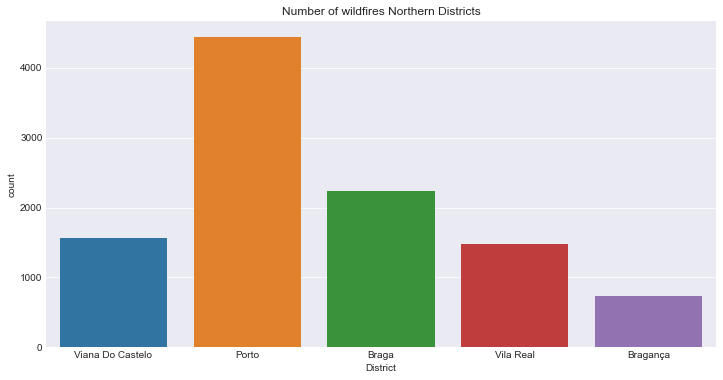

In [62]:
#Plot the unique values

sns.countplot(data=north, x='District');
plt.title("Number of wildfires Northern Districts")
plt.xticks(rotation=0)
plt.show()

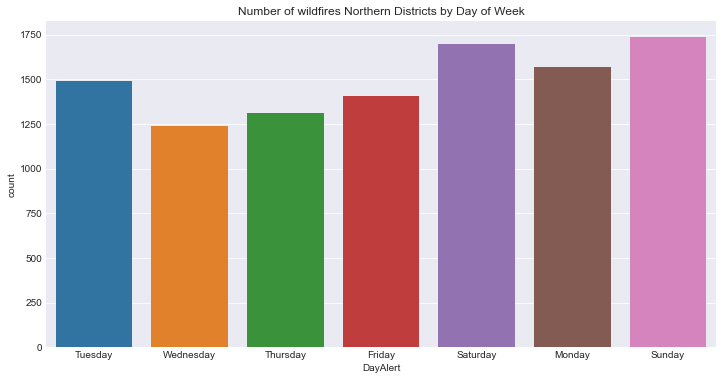

In [63]:
#Wildfire by day od the week

sns.countplot(data=north, x='DayAlert');
plt.title("Number of wildfires Northern Districts by Day of Week")
plt.xticks(rotation=0)
plt.show()

In [64]:
days = north.groupby(['District', 'DayAlert']).size().reset_index(name='count')

In [65]:
days.head()

,District,DayAlert,count
0,Braga,Friday,284
1,Braga,Monday,368
2,Braga,Saturday,374
3,Braga,Sunday,380
4,Braga,Thursday,236


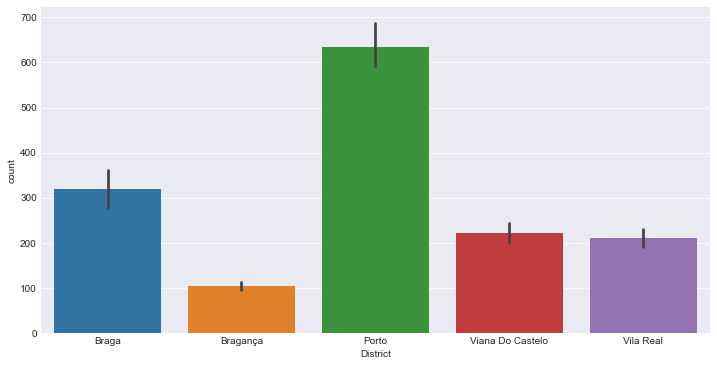

In [66]:
sns.barplot(data=days, x='District', y='count');


In [67]:
north.describe(include='all', datetime_is_numeric=True)

,District,Type,TypeCause,DateAlert,DateExtinction,HourAlert,HourExtinction,AreaTotal,FireAmountTime,DayAlert,DayExtinction,Month
count,10448,10448,6866,10448,10422,10448,10418,10448.000000,10418,10448,10422,10422
unique,5,4,5,NaN,NaN,NaN,NaN,NaN,NaN,7,7,12
top,Porto,Florestal,Negligente,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,Sunday,August
freq,4444,8709,2507,NaN,NaN,NaN,NaN,NaN,NaN,1739,1796,2207
mean,NaN,NaN,NaN,2015-06-24 04:49:50.811638784,2015-06-24 10:24:14.922280192,1900-01-01 14:51:30.591500800,1900-01-01 14:39:13.056248576,2.937096,-1 days +23:48:08.782875792,NaN,NaN,NaN
min,NaN,NaN,NaN,2015-01-01 00:00:00,2015-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,0.000000,-1 days +00:20:00,NaN,NaN,NaN
25%,NaN,NaN,NaN,2015-04-12 00:00:00,2015-04-12 00:00:00,1900-01-01 12:21:00,1900-01-01 11:00:00,0.010000,0 days 00:49:00,NaN,NaN,NaN
50%,NaN,NaN,NaN,2015-07-10 00:00:00,2015-07-10 00:00:00,1900-01-01 15:45:00,1900-01-01 16:45:00,0.050000,0 days 01:25:00,NaN,NaN,NaN
75%,NaN,NaN,NaN,2015-08-10 00:00:00,2015-08-10 00:00:00,1900-01-01 19:09:15,1900-01-01 19:50:00,0.500000,0 days 02:16:00,NaN,NaN,NaN
max,NaN,NaN,NaN,2015-12-27 00:00:00,2015-12-28 00:00:00,1900-01-01 23:59:00,1900-01-01 23:59:00,3023.990000,0 days 22:06:00,NaN,NaN,NaN


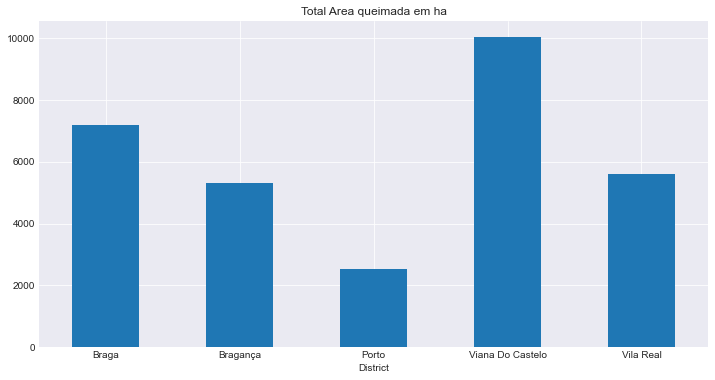

In [68]:
north.groupby('District')['AreaTotal'].sum().plot(kind='bar');
plt.title('Total Area queimada em ha')
plt.xticks(rotation=0)
plt.show()

KeyError: 'DurationHours'

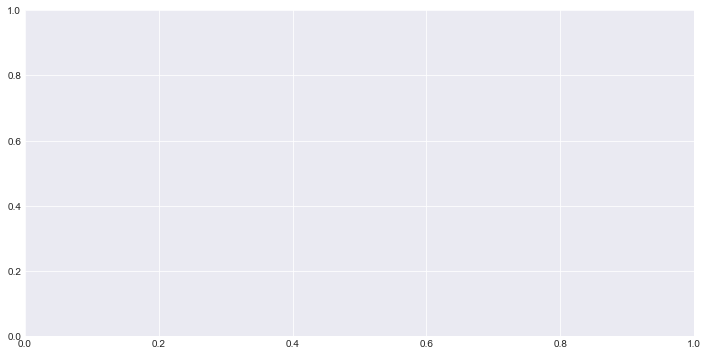

In [69]:
north.plot.scatter('DurationHours', 'AA_Total (pov+mato+agric) (ha)')

ValueError: Could not interpret input 'a'